<a href="https://colab.research.google.com/github/nit-1418/Deep_learning/blob/main/CNN_in_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here we are going to solve the MNIST digit classification problem, using a Convolution Neural Network (CNN).

The input vactor has new dimensions  (height, width, channels) or (image_size, image_size, 1) = (28, 28, 1) for the grayscale MNIST images. Resizing the train and test images will be needed to conform to this shape requirement.

In [ ]:
# Load dependencies

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import visualkeras
from PIL import Image

In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# input images dimensions
image_size = x_train.shape[1]

# resize and normilize
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np. reshape(x_test, (-1, image_size, image_size, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
# images is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

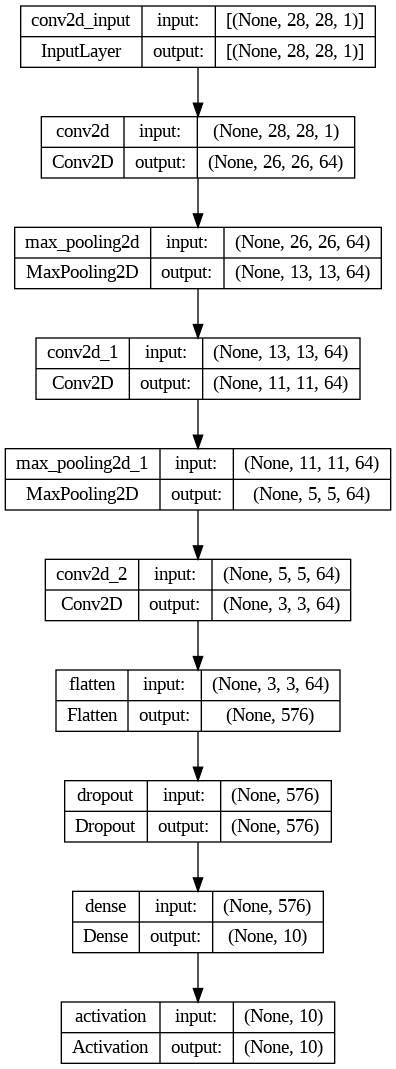

In [ ]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation = 'relu',
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters = filters,
                 kernel_size = kernel_size,
                 activation = 'relu'))
model.add(Flatten())

# dropout is added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file= 'cnn-mnist.png', show_shapes= True)

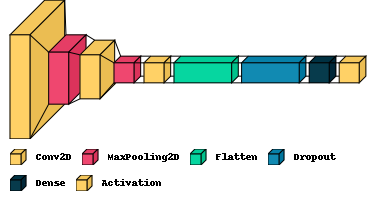

In [ ]:
# Visualize the model with visualkeras
visualkeras.layered_view(model, legend=True)

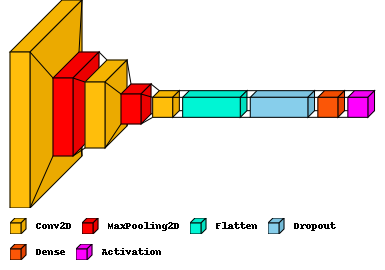

In [ ]:
from keras import layers
from collections import defaultdict

#  we can also change color and size
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#ffbe0b'
color_map[layers.MaxPooling2D]['fill'] = '#ff0000'
color_map[layers.Dropout]['fill'] = '#87CEEB'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#00f5d4'
color_map[layers.Activation]['fill'] = '#FF00FF'

img = visualkeras.layered_view(model, legend=True, color_map=color_map, scale_xy=6)  # Increase width

# Save the images
img.save("original_image.png")
img

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# train the network
model.fit (x_train, y_train, epochs = 10, batch_size = batch_size)

Epoch 1/10
469/469 [==============================] - 108s 226ms/step - loss: 0.2666 - accuracy: 0.9185
Epoch 2/10
469/469 [==============================] - 91s 194ms/step - loss: 0.0686 - accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 76s 163ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 74s 159ms/step - loss: 0.0317 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 76s 161ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 75s 159ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 75s 160ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 9/10
469/469 [==============================] - 76s 161ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 77s 164ms/step - 

In [ ]:
# Evaluate the model
acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

# Check if acc is a sequence (list or tuple)
if isinstance(acc, (list, tuple)):
    acc = acc[0]  # Take the first element if acc is a sequence

# Print the test accuracy
print("\nTest accuracy: %.1f%%" % (100.0 * acc))




Test accuracy: 2.7%


In [ ]:
# Evaluate the model
acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

# Print the test accuracy
print("\nOverall test accuracy:", acc)



Overall test accuracy: [0.026952475309371948, 0.9919000267982483]
